In [1]:
import requests
from getpass import getpass
import datetime as dt

In [2]:
class FintualApi:

    def __init__(self):
        self.__username = ""
        self.__password = ""

    def parse_date(self, date_str):
        '''
        Parseo la fecha que devuileve el servidor como string en
        un objeto datetime. El formato en el que viene es:
        Sun, 12 Dic 2021 19:18:40 GMT
        '''
        date_obj = dt.datetime.strptime(date_str, "%a, %d %b %Y %H:%M:%S %Z")
        return date_obj

    def get(self, url, params={}):
        params = {
            "days?from_date": input("format aaaa-mm-dd: "),
            "to_date": input("format aaaa-mm-dd: ")
        }
        r = requests.get(url='https://fintual.cl/api/real_assets/15077/days?', params=params)
        print(r.url)
        return r.json()

    
    def __str__(self):
        return f"Bienvenid@"

In [3]:
data_15077 = FintualApi.get('fefo',"https://fintual.cl/api/real_assets/")

format aaaa-mm-dd: 2021-01-01
format aaaa-mm-dd: 2021-11-30
https://fintual.cl/api/real_assets/15077/days?days%3Ffrom_date=2021-01-01&to_date=2021-11-30


In [4]:
data_15077

{'data': [{'id': '15077-2021-11-30',
   'type': 'real_asset_day',
   'attributes': {'date': '2021-11-30',
    'price': 1037.4023,
    'fixed_management_fee': 0.0,
    'fixed_management_fee_type': 'clp',
    'iva_exclusive_expenses': 0.0,
    'iva_exclusive_expenses_type': 'clp',
    'iva_inclusive_expenses': 0.0,
    'iva_inclusive_expenses_type': 'clp',
    'net_asset_value': 1037.4023,
    'net_asset_value_type': 'clp',
    'purchase_fee': 0.0,
    'purchase_fee_type': 'clp',
    'redemption_fee': 0.0,
    'redemption_fee_type': 'clp',
    'total_assets': 31514930556.0,
    'total_assets_type': 'clp',
    'total_net_assets': 30380011955.0,
    'total_net_assets_type': 'clp',
    'variable_management_fee': 0.0,
    'variable_management_fee_type': 'clp',
    'fixed_fee': None,
    'fixed_fee_type': None,
    'new_shares': 372563.7621,
    'new_shares_type': 'decimal',
    'outstanding_shares': 29284696.6076,
    'outstanding_shares_type': 'decimal',
    'redeemed_shares': 369081.8853,


In [5]:
prices = []
for i in range(0,365,1):
    prices.append(data_15077['data'][i]['attributes']['price'])

In [6]:
dates = []
for i in range(0,365,1):
    dates.append(data_15077['data'][i]['attributes']['date'])

In [7]:
prices.reverse()

In [8]:
dates.reverse()

In [9]:
import csv

In [10]:
datos = open('15077_dates.csv',mode='w',newline='')

In [11]:
csv_writer = csv.writer(datos,delimiter=',')

In [12]:
csv_writer.writerow(['fecha'])

7

In [13]:
for i in range(0,len(dates),1):
    csv_writer.writerow([dates[i]])

In [14]:
datos.close()

In [15]:
datos = open('15077_prices.csv',mode='w',newline='')

In [16]:
csv_writer = csv.writer(datos,delimiter=',')

In [17]:
csv_writer.writerow(['precio'])

8

In [18]:
for i in range(0,len(prices),1):
    csv_writer.writerow([prices[i]])

In [19]:
datos.close()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_dates = pd.read_csv('15077_dates.csv',delimiter=';')

In [22]:
df_dates.head()

,fecha
0,2020-12-01
1,2020-12-02
2,2020-12-03
3,2020-12-04
4,2020-12-05


In [23]:
df_prices = pd.read_csv('15077_prices.csv',delimiter=';')

In [24]:
df_prices.head()

,precio
0,1020.7209
1,1020.7719
2,1020.8229
3,1020.8739
4,1020.9249


In [25]:
axis0 = pd.concat([df_dates,df_prices],axis=1)

In [26]:
axis0.head()

,fecha,precio
0,2020-12-01,1020.7209
1,2020-12-02,1020.7719
2,2020-12-03,1020.8229
3,2020-12-04,1020.8739
4,2020-12-05,1020.9249


Text(0.5, 1.0, 'Very Conservative Streep')

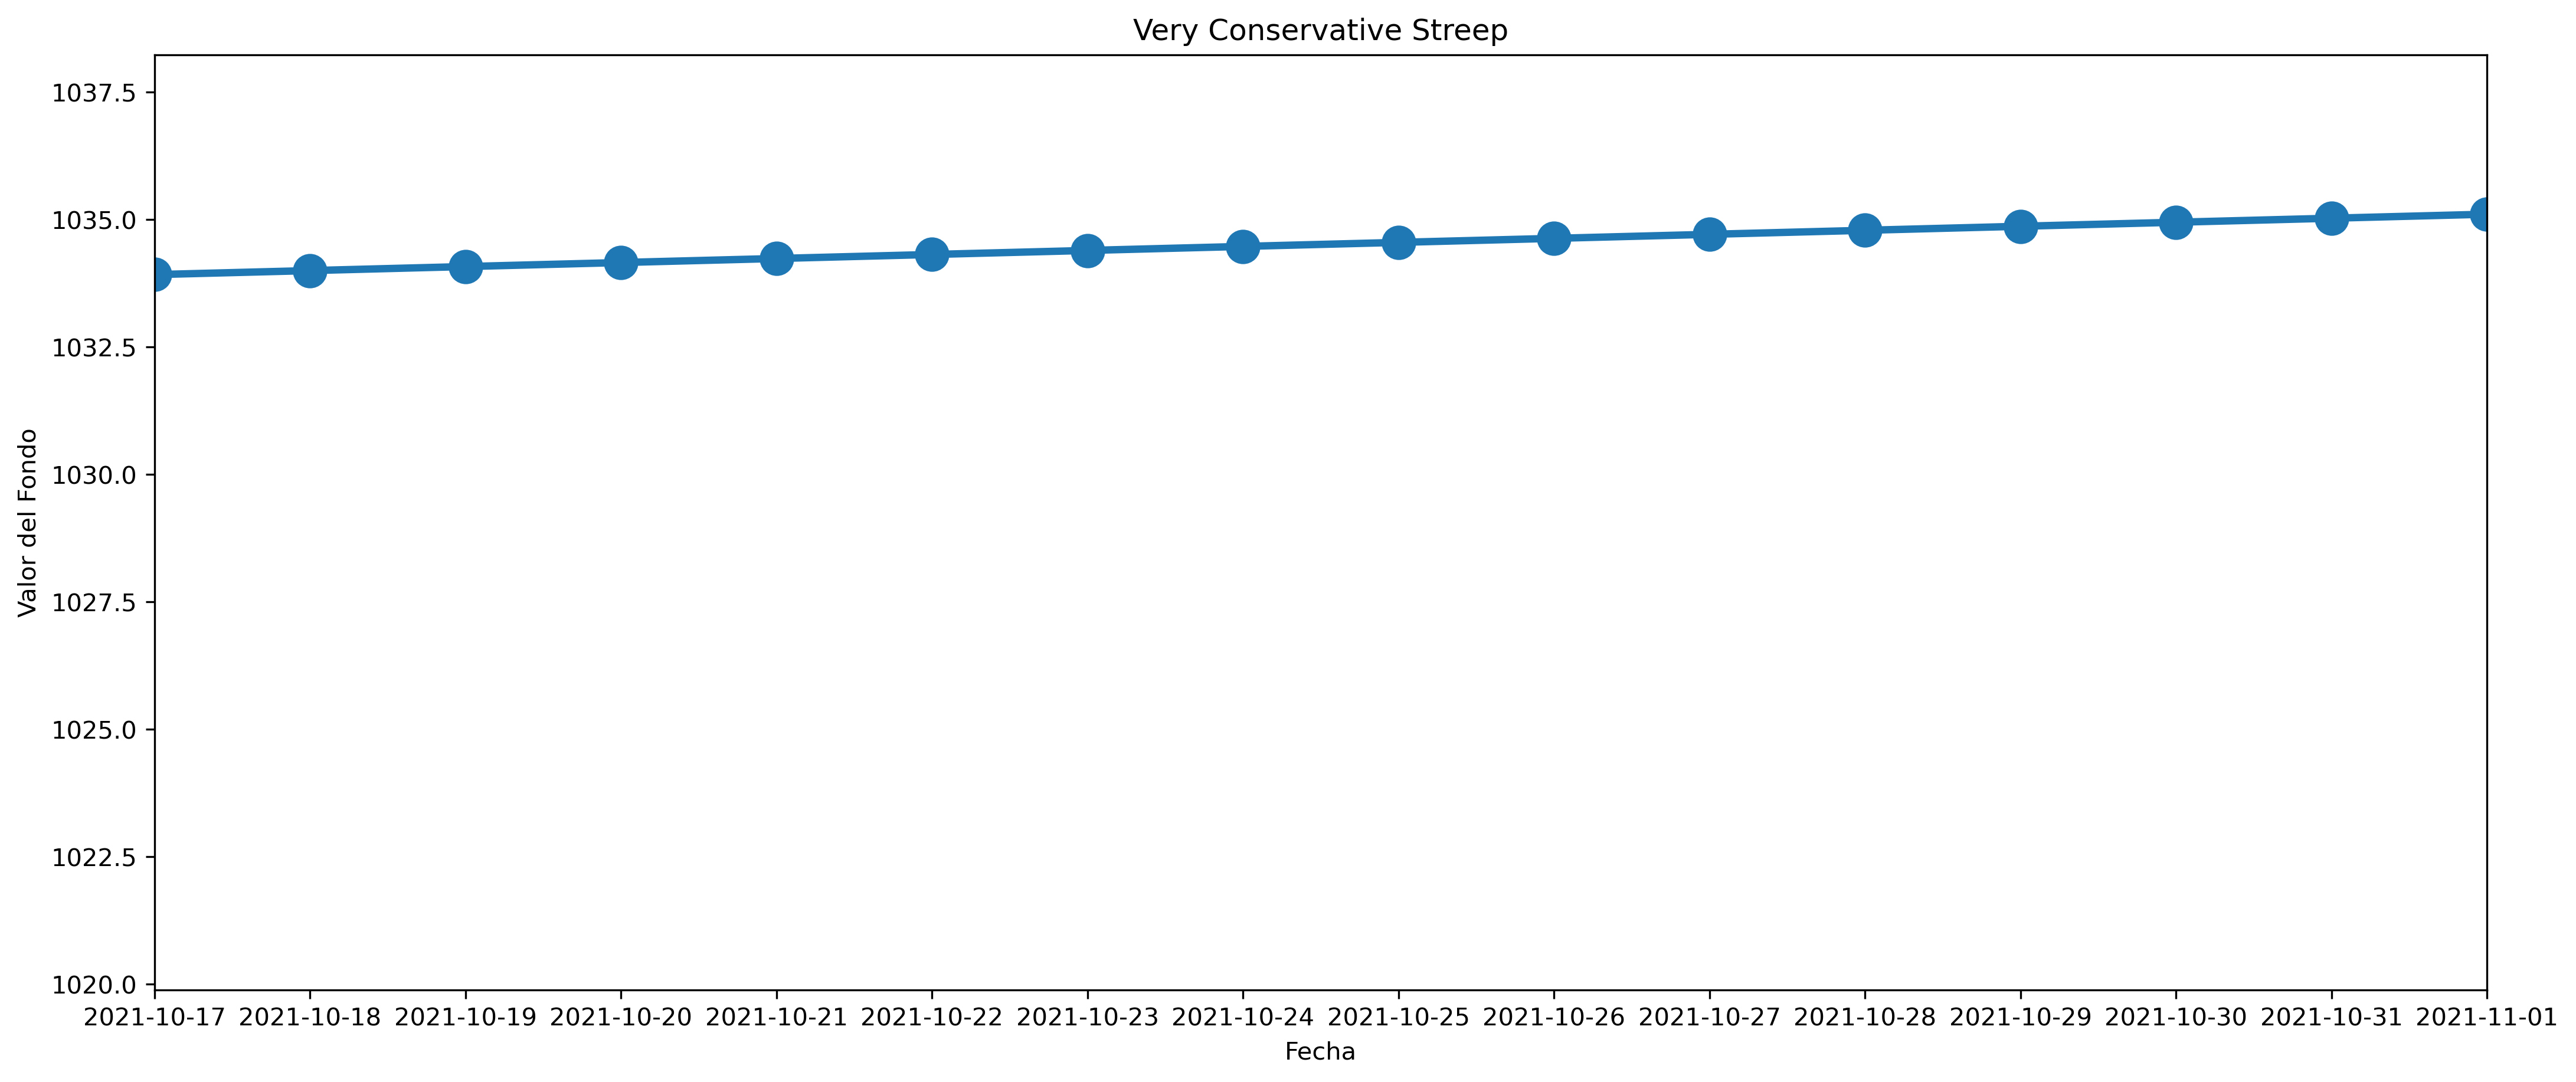

In [46]:
plt.figure(figsize=(17,7),dpi=300)
plt.plot(axis0['fecha'],axis0['precio'],marker='o',ms=13,lw=3)
plt.xlabel('Fecha')
plt.ylabel('Valor del Fondo')
plt.xlim(320,335)
plt.title('Very Conservative Streep')